In [1]:
# importing the libraries(step 1)
#data analysis,Maths or arrays,Kpi(graphs),kpi(graphs),,,
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
# import psql to run queires
import pandasql as psql

# EDA

In [2]:
#loading the universalbank dataset(step 2)
train_ds = pd.read_csv(r"C:\Users\Dlc\Downloads\sales_train.csv", header = 0)
test_ds = pd.read_csv(r"C:\Users\Dlc\Downloads\test.csv",header=0)
train_ds.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [3]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [4]:
train_ds['item_cnt_day']=train_ds['item_cnt_day'].astype(int)
train_ds.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1
1,03.01.2013,0,25,2552,899.00,1
2,05.01.2013,0,25,2552,899.00,-1
3,06.01.2013,0,25,2554,1709.05,1
4,15.01.2013,0,25,2555,1099.00,1


# Checking duplicates and null values

In [5]:
# identify the duplicates
train_dub = train_ds[train_ds.duplicated(keep='last')]
train_dub

#identify the missing values in the variables
train_ds.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

# train_ds dataset general info

In [6]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    int32  
dtypes: float64(1), int32(1), int64(3), object(1)
memory usage: 123.2+ MB


# test_ds dataset general info

In [7]:
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


In [8]:
test_ds.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


# Data manupulations

In [9]:
train_ds = train_ds[["date", "shop_id", "item_id", "item_cnt_day"]]
train_ds.head()

,date,shop_id,item_id,item_cnt_day
0,02.01.2013,59,22154,1
1,03.01.2013,25,2552,1
2,05.01.2013,25,2552,-1
3,06.01.2013,25,2554,1
4,15.01.2013,25,2555,1


In [10]:
train_ds["month"] = [ int(d.split(".")[1]) for d in train_ds["date"] ]
train_ds = train_ds.drop("date", axis=1)
train_ds.head()

,shop_id,item_id,item_cnt_day,month
0,59,22154,1,1
1,25,2552,1,1
2,25,2552,-1,1
3,25,2554,1,1
4,25,2555,1,1


In [11]:
train_ds = train_ds.groupby(by=["month", "shop_id", "item_id"]).sum()
train_ds.head()

item_cnt_day
month shop_id item_id              
1     0       32                  6
              33                  3
              35                  1
              43                  1
              51                  2

In [12]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1396971 entries, (1, 0, 32) to (12, 59, 22167)
Data columns (total 1 columns):
 #   Column        Non-Null Count    Dtype
---  ------        --------------    -----
 0   item_cnt_day  1396971 non-null  int32
dtypes: int32(1)
memory usage: 10.8 MB


In [13]:
shop_id = [i[1] for i in train_ds.index]
item_id = [i[2] for i in train_ds.index]
item_cnt_month = train_ds["item_cnt_day"].to_list()

In [14]:
train_ds = pd.DataFrame()
train_ds["shop_id"] = shop_id
train_ds["item_id"] = item_id
train_ds["item_cnt_month"] = item_cnt_month

train_ds.info()
train_ds

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396971 entries, 0 to 1396970
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   shop_id         1396971 non-null  int64
 1   item_id         1396971 non-null  int64
 2   item_cnt_month  1396971 non-null  int64
dtypes: int64(3)
memory usage: 32.0 MB


,shop_id,item_id,item_cnt_month
0,0,32,6
1,0,33,3
2,0,35,1
3,0,43,1
4,0,51,2
...,...,...,...
1396966,59,22087,27
1396967,59,22088,30
1396968,59,22091,11
1396969,59,22092,10


# Outliers

In [15]:
item_cnt_month_UL = round(train_ds.item_cnt_month.mean() + 3 * train_ds.item_cnt_month.std(),3)
item_cnt_month_LL = round(train_ds.item_cnt_month.mean() - 3 * train_ds.item_cnt_month.std(),3)
train_ds= train_ds[(train_ds.item_cnt_month >item_cnt_month_LL) & (train_ds.item_cnt_month <item_cnt_month_UL)]
train_ds.shape

(1392416, 3)

# Dependancies studying

In [16]:
train_y = train_ds["item_cnt_month"]
train_X = train_ds.drop("item_cnt_month", axis=1)

(array([44.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.000000e+00, 8.456640e+04, 1.691318e+05, 2.536972e+05,
        3.382626e+05, 4.228280e+05, 5.073934e+05, 5.919588e+05,
        6.765242e+05, 7.610896e+05, 8.456550e+05]),
 <BarContainer object of 10 artists>)

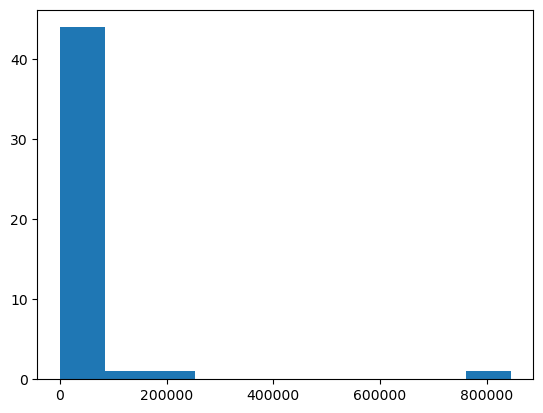

In [17]:
val_counts = train_y.value_counts()
plt.hist(val_counts)

# Statistical characteristics

In [18]:
val_counts

 1     845655
 2     247493
 3     105052
 4      55519
 5      33778
 6      22474
 7      15778
 8      11825
 9       8765
 10      6761
 11      5378
 12      4431
 13      3676
 14      3047
 15      2618
 16      2153
 0       2137
 17      1849
 18      1648
 19      1364
 20      1270
 21      1046
 22       954
 23       860
-1        709
 24       699
 25       636
 26       630
 27       526
 28       524
 29       440
 30       416
 31       369
 32       352
 33       298
 35       282
 34       273
 36       257
 38       231
 37       213
-2         23
-4          2
-13         1
-6          1
-5          1
-3          1
-22         1
Name: item_cnt_month, dtype: int64

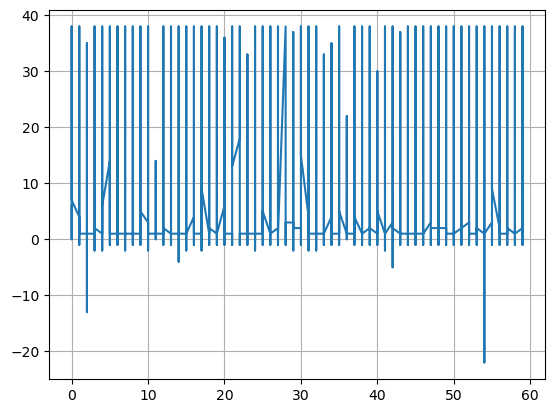

In [19]:
ds = train_X.sort_values(by=["shop_id"])

plt.plot(ds["shop_id"], train_y)
plt.grid()
plt.show()

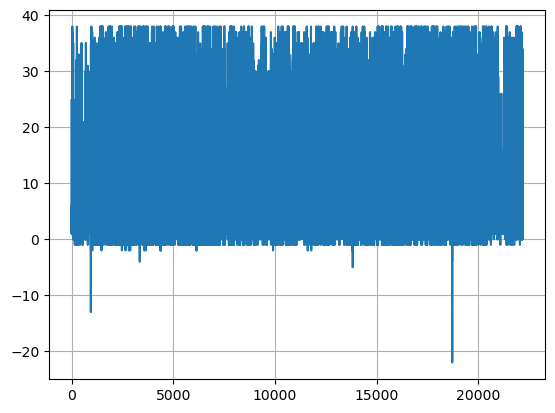

In [20]:
ds = train_X.sort_values(by=["item_id"])

plt.plot(ds["item_id"], train_y)
plt.grid()
plt.show()


<Axes: >

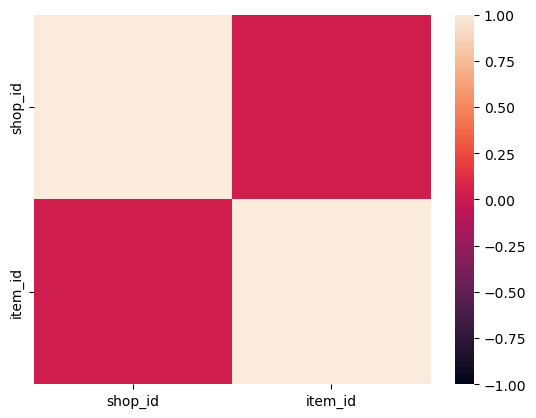

In [21]:
sns.heatmap(train_X.corr(method="spearman"), vmin=-1, vmax=1)

In [22]:
train_X.corr(method="spearman")

,shop_id,item_id
shop_id,1.000000,0.024193
item_id,0.024193,1.000000


In [23]:
train_ds.describe()

,shop_id,item_id,item_cnt_month
count,1.392416e+06,1.392416e+06,1.392416e+06
mean,3.269763e+01,1.085047e+04,2.272846e+00
std,1.660011e+01,6.229772e+03,3.121251e+00
min,0.000000e+00,0.000000e+00,-2.200000e+01
25%,2.100000e+01,5.272000e+03,1.000000e+00
50%,3.100000e+01,1.077700e+04,1.000000e+00
75%,4.700000e+01,1.614700e+04,2.000000e+00
max,5.900000e+01,2.216900e+04,3.800000e+01


In [24]:
#identify the independent and target (dependent) variables

IndepVar = []
for col in train_ds.columns:
    if col != 'item_cnt_month':
        IndepVar.append(col)
        
TargetVar = 'item_cnt_month'

x = train_ds[IndepVar]
y = train_ds[TargetVar]

# Sampling

In [25]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Display the shape for train & test data

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((974691, 2), (417725, 2), (974691,), (417725,))

# Scaling

In [26]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
#x_train[cols2] = mmscaler.fit_transform(x_train[cols2])
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
#_test[cols2] = mmscaler.fit_transform(x_test[cols2])
x_test = pd.DataFrame(x_test)

# Multi regression model

In [27]:
# Build the multi regression model

from sklearn.linear_model import LinearRegression  
# Create object for the model

ModelMLR = LinearRegression()

# Train the model with training data

ModelMLR.fit(x_train, y_train)

# Predict the model with test dataset

y_pred = ModelMLR.predict(x_test)

# Evaluation metrics for Regression analysis

from sklearn import metrics
print('mean Absolute Error(MAE):',round(metrics.mean_absolute_error(y_test,y_pred),3))
print('mean squared Error(ME):',round(metrics.mean_absolute_error(y_test,y_pred),2))
print('Root mean Absolute Error(RMAE):',round(np.sqrt(metrics.mean_absolute_error(y_test,y_pred)),3))  
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
print('Mean Absolute Percentage Error(MAPE):',round(metrics.mean_absolute_percentage_error(y_test,y_pred)*100,3),'%')
print('Root mean Squared Log Error(RMSLE):',round(np.log(np.sqrt(metrics.mean_squared_error(y_test,y_pred))),3))


# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

mean Absolute Error(MAE): 1.642
mean squared Error(ME): 1.64
Root mean Absolute Error(RMAE): 1.281
R2_score: 0.00981
Mean Absolute Percentage Error(MAPE): 1535224061594826.8 %
Root mean Squared Log Error(RMSLE): 1.137
Adj R Square:  0.009809


In [28]:
Results = pd.DataFrame({'item_cnt_month_A':y_test, 'item_cnt_month_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = train_ds.merge(Results, left_index=True, right_index=True)

# Display 5 records randomly

ResultsFinal.sample(5)

,shop_id,item_id,item_cnt_month,item_cnt_month_A,item_cnt_month_P
848538,54,13420,5,5,2.199225
1065675,50,17458,1,1,1.994686
179755,22,8357,1,1,2.363123
910799,27,14119,1,1,2.098033
540787,19,4181,15,15,2.556805


In [29]:
RGResults = pd.read_csv(r"C:\Users\Dlc\Downloads\RGRResults.csv", header = 0)

RGResults.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


# Prediction Models

In [30]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
#from sklearn.svm import SVR

# Create objects of Regression / Regressor models with default hyper-parameters

ModelMLR = LinearRegression()
ModelDCR = DecisionTreeRegressor()
ModelRFR = RandomForestRegressor()
ModelETR = ExtraTreesRegressor()
ModelKNN = KNeighborsRegressor(n_neighbors=5)
ModelBRR = BayesianRidge()
#ModelSVR = SVR()

# Evalution matrix for all the algorithms

#MM = [ModelMLR, ModelDCR, ModelRFR, ModelETR, ModelKNN, ModelBRR, ModelSVR] 
MM = [ModelMLR, ModelDCR, ModelRFR, ModelETR, ModelKNN, ModelBRR]

for models in MM:
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    print('Mean Absolute Percentage Error(MAPE):',round(metrics.mean_absolute_percentage_error(y_test,y_pred)*100,3),'%')
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    #def MAPE (y_test, y_pred):
       # y_test, y_pred = np.array(y_test), np.array(y_pred)
       # return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    # Evaluation of MAPE 

    #result = MAPE(y_test, y_pred)
    #print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' :metrics.mean_absolute_percentage_error(y_test,y_pred)*100,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    RGResults = RGResults.append(new_row, ignore_index=True)
    #-------------------------------------------------------------------------------------------


Model Name:  LinearRegression()
Mean Absolute Error (MAE): 1.642
Mean Squared Error (MSE): 9.723
Root Mean Squared Error (RMSE): 3.118
R2_score: 0.00981
Root Mean Squared Log Error (RMSLE): 1.137
Mean Absolute Percentage Error(MAPE): 1535224061594826.8 %
Adj R Square:  0.009809
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1.335
Mean Squared Error (MSE): 8.547
Root Mean Squared Error (RMSE): 2.924
R2_score: 0.12953
Root Mean Squared Log Error (RMSLE): 1.073
Mean Absolute Percentage Error(MAPE): 1161879991414732.2 %
Adj R Square:  0.129529
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1.319
Mean Squared Error (MSE): 8.006
Root Mean Squared Error (RMSE): 2.83
R2_score: 0.184624
Root Mean Squared Log Error (RMSLE): 1.04
Mean Absolute Perce

In [31]:
RGResults.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),1.642162,0.009809,3.118175,1.535224e+15,9.723017,1.137248,0.009810
1,DecisionTreeRegressor(),1.335185,0.129529,2.923600,1.161880e+15,8.547439,1.072816,0.129530
2,"(DecisionTreeRegressor(max_features=1.0, rando...",1.319399,0.184623,2.829569,1.176407e+15,8.006461,1.040124,0.184624
3,"(ExtraTreeRegressor(random_state=469839908), E...",1.286453,0.232187,2.745799,1.194163e+15,7.539411,1.010072,0.232188
4,KNeighborsRegressor(),1.364966,0.190632,2.819122,1.243294e+15,7.947452,1.036426,0.190633


# Prediction 

In [32]:
y_predF = ModelETR.predict(x_test)

In [33]:
Results = pd.DataFrame({'item_cnt_month_A':y_test, 'item_cnt_month_P':y_predF})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = train_ds.merge(Results, left_index=True, right_index=True)

# Display 5 records randomly

ResultsFinal.sample(5)

,shop_id,item_id,item_cnt_month,item_cnt_month_A,item_cnt_month_P
918536,30,2270,3,3,2.532
272435,4,5999,1,1,1.000
778521,22,1717,1,1,1.325
159245,10,16071,1,1,1.345
579537,35,12816,1,1,1.390


In [34]:
# Calculate the %of Error

ResultsFinal['%Error'] = round(((ResultsFinal['item_cnt_month_A']-ResultsFinal['item_cnt_month_P'])/ResultsFinal['item_cnt_month_A'])*100,3)
ResultsFinal.sample(5)

,shop_id,item_id,item_cnt_month,item_cnt_month_A,item_cnt_month_P,%Error
1147851,31,20433,1,1,1.425000,-42.500
488261,48,17980,1,1,1.020000,-2.000
221929,38,6436,1,1,1.862667,-86.267
768954,16,19864,1,1,1.810000,-81.000
1313312,21,5323,14,14,4.948000,64.657


# Completed